In [1]:
# classifier and attacker
# dataset: mnist
# author: Ying Meng

# ---------------------
# import required packages
# ---------------------
from __future__ import division, absolute_import, print_function
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras import layers, models
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from cleverhans.evaluation import batch_eval
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
W0703 11:13:45.665280 139830296741632 deprecation_wrapper.py:119] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/cleverhans/utils_tf.py:341: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



In [2]:
# parameters
IMG_ROW = 28
IMG_COL = 28
LR = 0.001
BATCH_SIZE = 128
VAL_RATE = 0.2

In [3]:
'''
Load data
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(-1, IMG_ROW, IMG_COL, 1)
# cast pixels to floats, normalize to [0, 1] range
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot-encode the labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

nb_train = int(len(X_train) * VAL_RATE)
train_samples = X_train[:-nb_train]
train_classes = Y_train[:-nb_train]
val_samples = X_train[-nb_train:]
val_classes = Y_train[-nb_train:]

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


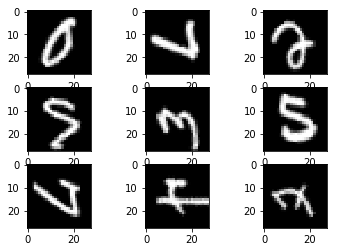

In [4]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

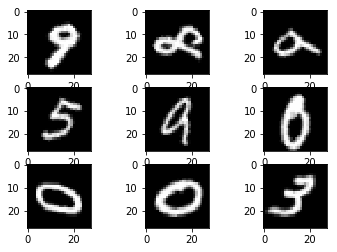

In [5]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [6]:
'''
Define model structures for some datasets.
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
# Set random seed
np.random.seed(0)

# datasets
DATASETS = ['mnist', 'cifar']

def cnn(dataset='mnist'):
    """
    Takes in a parameter indicating which model type to use ('mnist', or
    'cifar') and returns the appropriate Keras model.
    :param dataset: A string indicating which dataset we are building
                    a model for.
    :return: The model; a Keras 'Sequential' instance.
    """
    assert dataset in DATASETS, "dataset parameter must be either 'mnist' or 'cifar'"

    if dataset == 'mnist':
        # MNIST model
        struct = [
            layers.Conv2D(32, (3, 3), input_shape = (IMG_ROW, IMG_COL, 1)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Conv2D(64, (3, 3)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Flatten(),
            layers.Dense(64 * 64),
            layers.Dropout(rate = 0.4),
            layers.Dense(10),
            layers.Activation('softmax')
        ]
    elif dataset == 'cifar':
        # CIFAR-10 model
        raise NotImplementedError('Not ready yet.')

    model = models.Sequential()
    for layer in struct:
        model.add(layer)

    return model

In [7]:
# Define the model
model = cnn('mnist')
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
# Train the model
model.fit(train_samples, train_classes, epochs = 15,
          batch_size = BATCH_SIZE, shuffle = True,
          verbose = 1, validation_data = (val_samples, val_classes))

# Save the model
model.save("data/mnist_Rotate90_cnn.h5")
print("Trained model has been saved to data/ \subfolder")

W0703 11:13:47.139808 139830296741632 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 34s 715us/sample - loss: 0.1481 - acc: 0.9545 - val_loss: 0.0614 - val_acc: 0.9819
Epoch 2/15
48000/48000 [==============================] - 34s 703us/sample - loss: 0.0483 - acc: 0.9850 - val_loss: 0.0485 - val_acc: 0.9852
Epoch 3/15
48000/48000 [==============================] - 34s 703us/sample - loss: 0.0359 - acc: 0.9889 - val_loss: 0.0422 - val_acc: 0.9881
Epoch 4/15
48000/48000 [==============================] - 34s 703us/sample - loss: 0.0286 - acc: 0.9908 - val_loss: 0.0434 - val_acc: 0.9880
Epoch 5/15
48000/48000 [==============================] - 36s 744us/sample - loss: 0.0219 - acc: 0.9927 - val_loss: 0.0577 - val_acc: 0.9837
Epoch 6/15
48000/48000 [==============================] - 37s 775us/sample - loss: 0.0224 - acc: 0.9925 - val_loss: 0.0498 - val_acc: 0.9865
Epoch 7/15
48000/48000 [==============================] - 38s 793us/sample - loss: 0.0173 - acc: 0.9944 

In [8]:
# Load the trained model
model = load_model("data/mnist_cnn.h5")

_, acc = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc: {}'.format(100 * acc))

W0703 11:22:33.990026 139830296741632 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 11:22:33.995636 139830296741632 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


test acc: 99.019998312


In [9]:
def fgsm(x, prediction, epsilon, y = None):
    '''
    Define the symbolic FGSM fitting tf framework
    Ying Meng
    '''
    if y is None:
        y = tf.to_float(tf.equal(prediction, 
                                tf.reduce_max(prediction, 1, keepdims = True)))
        
    y /= tf.reduce_sum(y, 1, keepdims = True)
    
    logits, = prediction.op.inputs
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))

    grad, = tf.gradients(loss, x)
    perturbation = epsilon * tf.sign(grad)
    adv_sample = tf.stop_gradient(x + perturbation)
    
    return adv_sample

In [10]:
# Create TF session
sess = tf.Session()
K.set_session(sess)
K.set_learning_phase(0)

# define tf placeholders and operations
x = tf.placeholder(tf.float32, shape = (None,) + X_test.shape[1:])
y = tf.placeholder(tf.float32, shape = (None,) + Y_test.shape[1:])

# load model
model = load_model("data/mnist_cnn.h5")

# model accuracy
_, acc_original = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print('test acc (on original): {}'.format(acc_original))

# symbolic fgsm
epsilon = 0.25
x_adv = fgsm(x, model(x), epsilon = epsilon, y = y)

# craft adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)

# test accuracy on adversarial examples
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))

# save the generated adversarial examples
np.save("data/adv_mnist_fgsm_eps25.npy", X_adv)
print('adversarial examples were generated and saved to data/ \subfolder')
#sess.close()

test acc (on original): 0.99019998312
test acc (on adversarial): 0.29929998517 - (epsilon: 0.25)
adversarial examples were generated and saved to data/ \subfolder


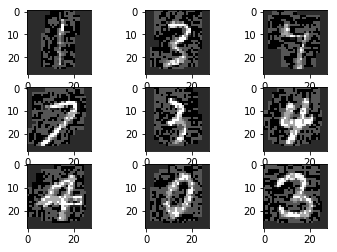

In [12]:
# define data preparation
datagen = ImageDataGenerator(rescale=1./255)
# fit parameters from data
datagen.fit(X_adv)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_adv, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [13]:
# Error Rate
# 1. load the model
model = load_model("data/mnist_cnn.h5")
# 2. load the adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))
adv_pred = model.predict(X_adv)
totaladvcount = 0
count = 0
prediction =np.argmax(adv_pred,axis=1)
for i in range(len(prediction)):
    if (prediction[i]==np.argmax(Y_test[i])):
        totaladvcount = totaladvcount+1
    if (np.argmax(adv_pred[i]) != np.argmax(prediction[i])):
        count= count+1
        print("predicate class: {}, True label: {}, totaladv: {}, counter: {} ".format(prediction, Y_test, totaladvcount, count))
error_rate = (1.0 * count/totaladvcount)
print("error rate is: " + str(error_rate))

test acc (on adversarial): 0.29929998517 - (epsilon: 0.25)
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 0, counter: 1 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1, counter: 2 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1, counter: 3 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1, counter: 4 
predicate class: [2 2

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 96, counter: 345 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 96, counter: 346 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 97, counter: 347 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 97, counter: 348 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0.

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 180, counter: 722 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 180, counter: 723 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 180, counter: 724 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 181, counter: 725 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 298, counter: 1099 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 298, counter: 1100 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 298, counter: 1101 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 298, counter: 1102 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 413, counter: 1479 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 413, counter: 1480 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 414, counter: 1481 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 415, counter: 1482 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 512, counter: 1829 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 512, counter: 1830 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 513, counter: 1831 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 513, counter: 1832 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 589, counter: 2129 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 590, counter: 2130 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 591, counter: 2131 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 591, counter: 2132 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 677, counter: 2454 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 677, counter: 2455 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 678, counter: 2456 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 679, counter: 2457 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 751, counter: 2754 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 751, counter: 2755 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 751, counter: 2756 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 751, counter: 2757 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 856, counter: 3077 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 856, counter: 3078 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 856, counter: 3079 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 856, counter: 3080 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 939, counter: 3382 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 939, counter: 3383 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 940, counter: 3384 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 940, counter: 3385 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. .

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1051, counter: 3724 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1052, counter: 3725 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1053, counter: 3726 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1053, counter: 3727 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1142, counter: 4037 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1142, counter: 4038 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1143, counter: 4039 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1144, counter: 4040 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1232, counter: 4362 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1232, counter: 4363 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1232, counter: 4364 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1233, counter: 4365 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1336, counter: 4719 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1337, counter: 4720 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1337, counter: 4721 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1337, counter: 4722 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1436, counter: 5032 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1436, counter: 5033 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1436, counter: 5034 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1436, counter: 5035 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1537, counter: 5297 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1537, counter: 5298 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1537, counter: 5299 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1537, counter: 5300 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1538, counter: 5301

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1647, counter: 5625 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1647, counter: 5626 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1648, counter: 5627 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1648, counter: 5628 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1752, counter: 5935 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1752, counter: 5936 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1753, counter: 5937 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1753, counter: 5938 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1890, counter: 6232 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1890, counter: 6233 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1891, counter: 6234 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1891, counter: 6235 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1991, counter: 6586 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1992, counter: 6587 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1992, counter: 6588 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 1993, counter: 6589 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2124, counter: 6932 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2124, counter: 6933 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2124, counter: 6934 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2125, counter: 6935 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2225, counter: 7235 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2225, counter: 7236 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2225, counter: 7237 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2225, counter: 7238 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2339, counter: 7593 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2339, counter: 7594 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2339, counter: 7595 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2340, counter: 7596 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2434, counter: 7948 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2434, counter: 7949 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2434, counter: 7950 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2434, counter: 7951 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2557, counter: 8311 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2557, counter: 8312 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2557, counter: 8313 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2558, counter: 8314 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2674, counter: 8592 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2675, counter: 8593 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2675, counter: 8594 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2676, counter: 8595 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2799, counter: 8948 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2800, counter: 8949 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2801, counter: 8950 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2802, counter: 8951 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2909, counter: 9285 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2909, counter: 9286 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2909, counter: 9287 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], totaladv: 2909, counter: 9288 
predicate class: [2 2 8 ... 8 3 0], True label: [[0. 0. 

In [14]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(-1, IMG_ROW, IMG_COL, 1)
# cast pixels to floats, normalize to [0, 1] range
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot-encode the labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

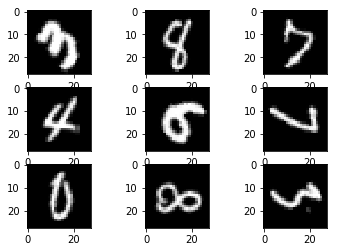

In [15]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

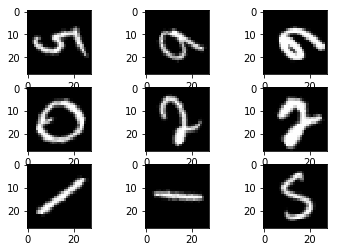

In [16]:
# define data preparation
datagen = ImageDataGenerator(rotation_range = 90)
# fit parameters from data
datagen.fit(X_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [17]:
'''
Define model structures for some datasets.
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
# Set random seed
np.random.seed(0)

# datasets
DATASETS = ['mnist', 'cifar']

def cnn(dataset='mnist'):
    """
    Takes in a parameter indicating which model type to use ('mnist', or
    'cifar') and returns the appropriate Keras model.
    :param dataset: A string indicating which dataset we are building
                    a model for.
    :return: The model; a Keras 'Sequential' instance.
    """
    assert dataset in DATASETS, "dataset parameter must be either 'mnist' or 'cifar'"

    if dataset == 'mnist':
        # MNIST model
        struct = [
            layers.Conv2D(32, (3, 3), input_shape = (IMG_ROW, IMG_COL, 1)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Conv2D(64, (3, 3)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Flatten(),
            layers.Dense(64 * 64),
            layers.Dropout(rate = 0.4),
            layers.Dense(10),
            layers.Activation('softmax')
        ]
    elif dataset == 'cifar':
        # CIFAR-10 model
        raise NotImplementedError('Not ready yet.')

    model = models.Sequential()
    for layer in struct:
        model.add(layer)

    return model

In [18]:
# Define the model
model = cnn('mnist')
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
# Train the model
model.fit(train_samples, train_classes, epochs = 15,
          batch_size = BATCH_SIZE, shuffle = True,
          verbose = 1, validation_data = (val_samples, val_classes))

# Save the model
model.save("data/mnist_Rotate90_cnn.h5")
print("Trained model has been saved to data/ \subfolder")

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 34s 715us/sample - loss: 0.1491 - acc: 0.9536 - val_loss: 0.0630 - val_acc: 0.9801
Epoch 2/15
48000/48000 [==============================] - 31s 647us/sample - loss: 0.0489 - acc: 0.9849 - val_loss: 0.0450 - val_acc: 0.9868
Epoch 3/15
48000/48000 [==============================] - 32s 661us/sample - loss: 0.0371 - acc: 0.9890 - val_loss: 0.0446 - val_acc: 0.9862
Epoch 4/15
48000/48000 [==============================] - 31s 654us/sample - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0430 - val_acc: 0.9878
Epoch 5/15
48000/48000 [==============================] - 31s 650us/sample - loss: 0.0239 - acc: 0.9920 - val_loss: 0.0517 - val_acc: 0.9857
Epoch 6/15
48000/48000 [==============================] - 31s 646us/sample - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0567 - val_acc: 0.9848
Epoch 7/15
48000/48000 [==============================] - 31s 644us/sample - loss: 0.0148 - acc: 0.9949 

In [19]:
# Load the trained model
model = load_model("data/mnist_cnn.h5")

_, acc = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc: {}'.format(100 * acc))

test acc: 99.019998312
